In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sb
sb.set_style('darkgrid') 
import pandas as pd
import statsmodels.api as sm


In [2]:
dfwine = pd.read_csv('winemag-data_first150k.csv')

In [16]:
dfwine.head()

,description,designation,points,price,province,region_1,region_2,variety,winery
Unnamed: 0,,,,,,,,,
0,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


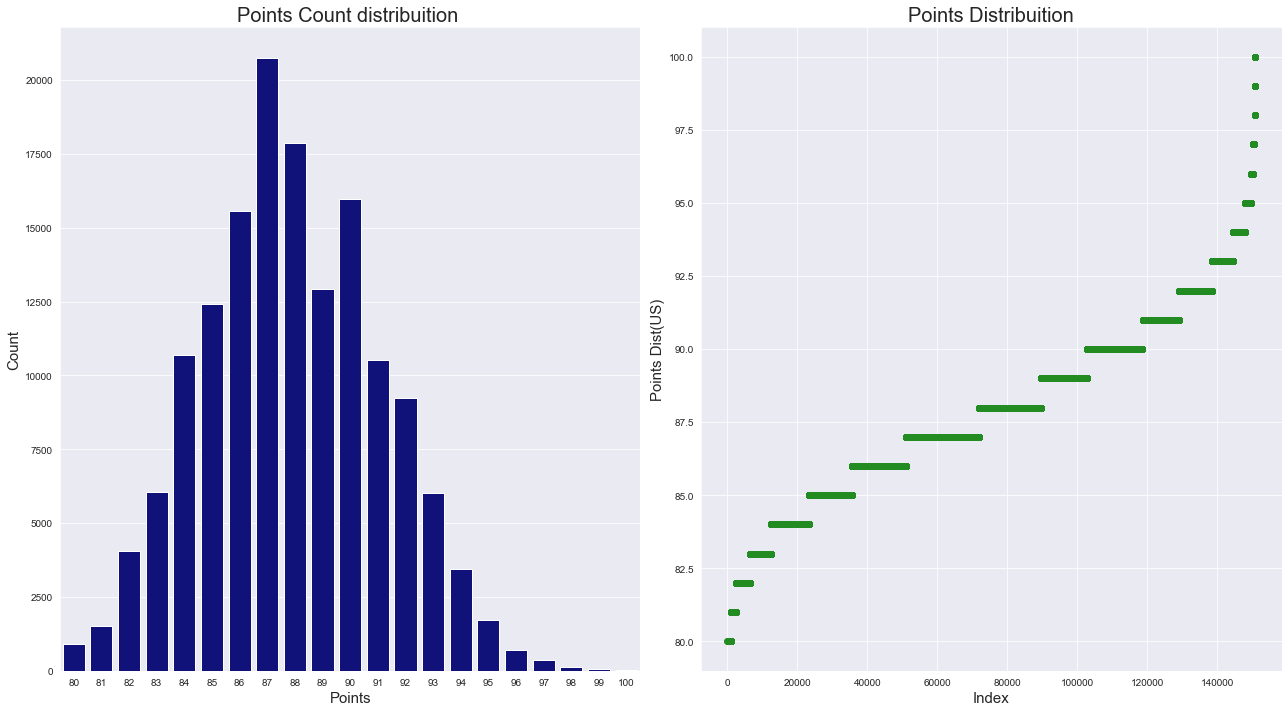

In [212]:
plt.figure(figsize=(18,10))


plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sb.countplot(x='points', data=dfwine, color='darkblue') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(dfwine.shape[0]), np.sort(dfwine.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.tight_layout()
plt.show()

We can see the distribution of Wine points roughly falls into a normal distribution pattern. We see a slight leftward skew towards the lower end of the scale, scale ranges from 80-100 points which we will further breakdown later. Two different distribution plots give us a slightly different take on the same data. 

In [4]:
#function to group point scores into discrete categories
def cat_points(points):
    if points in list(range(80,83)):
        return 'poor'
    elif points in list(range(83,87)):
        return 'fair'
    elif points in list(range(87,90)):
        return 'good'
    elif points in list(range(90,94)):
        return 'great'
    elif points in list(range(94,98)):
        return 'excellent'
    else:
        return 'amazing'

dfwine["rating_cat"] = dfwine["points"].apply(cat_points)



Here we group our wines into categories for easy management. 6 Categories covering, poor, fair, good, great, excellent, amazing.

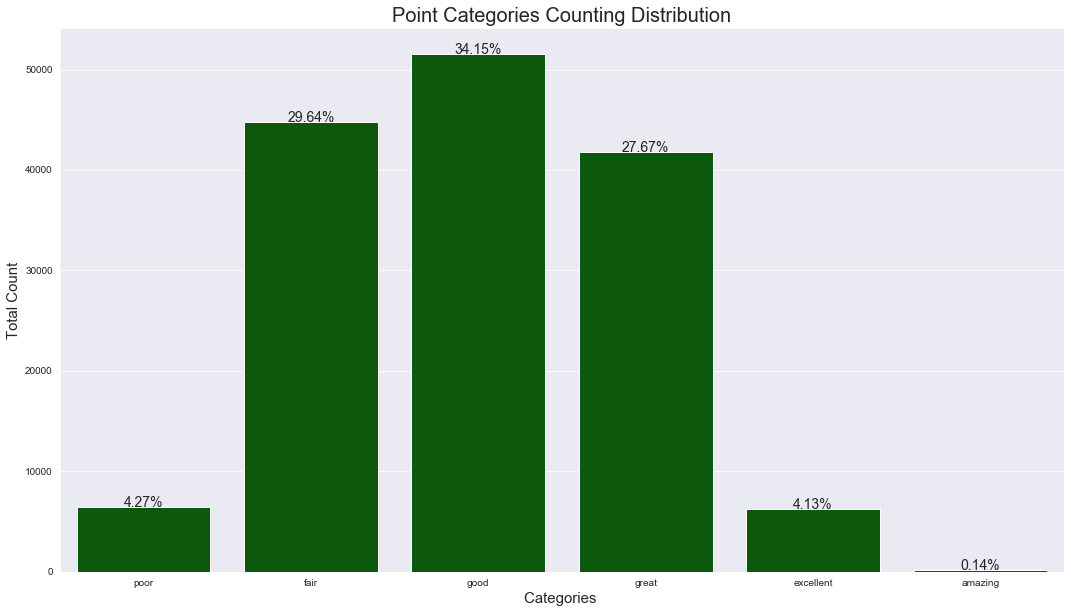

In [5]:
total = len(dfwine)
plt.figure(figsize=(18,10))

g = sb.countplot(x='rating_cat', color='darkgreen',
                  data=dfwine, order=('poor','fair','good','great','excellent','amazing'))
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]
#asigning data labels base on total percentage
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14) 

Here we see the % distribution for the 6 wine category ratings. Again we see a slight skew towards the lower ratings. Interesting note is the 'Amazing' category is just .14% percent of the total amount of wines, or about 210 wines of the total 150k.

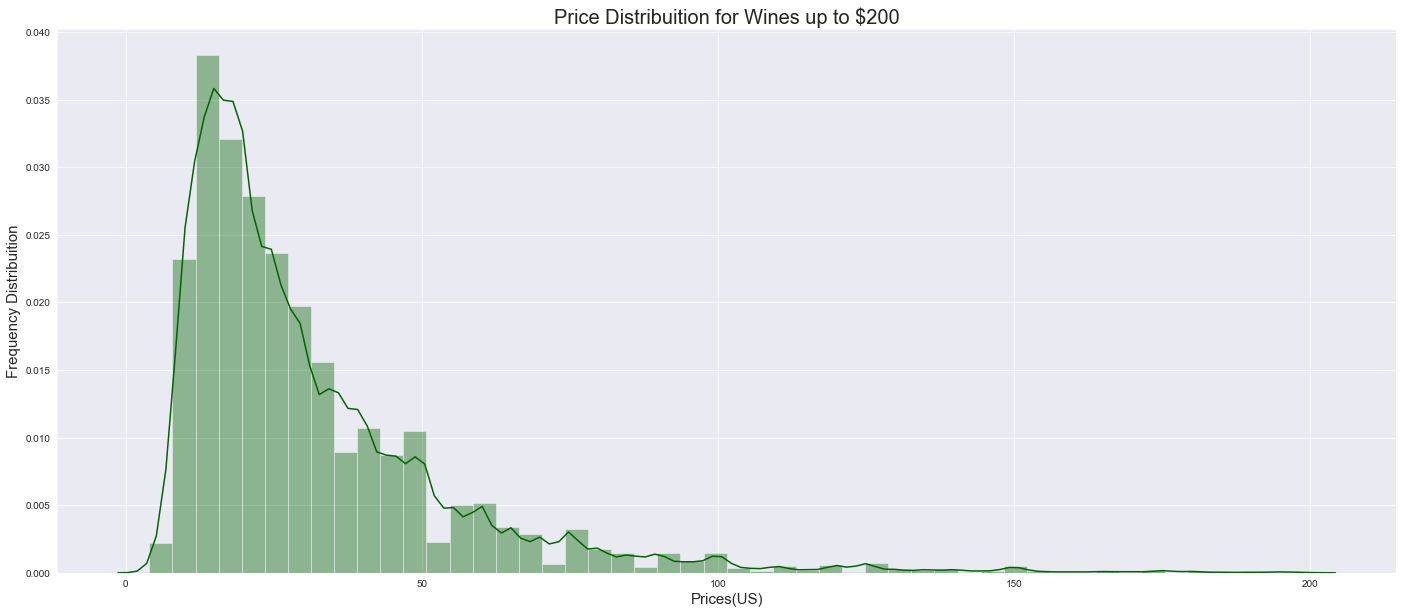

<Figure size 432x288 with 0 Axes>

In [216]:
plt.figure(figsize=(24,10))

g = sb.distplot(dfwine[dfwine['price'] < 200]['price'], color='darkgreen')
g.set_title("Price Distribuition for Wines up to $200", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()
plt.tight_layout()

Distribution of the prices of wines. Shows a vast majority of them range in price from $0-$100. 

Text(0.5, 1.0, 'Wine Country for "Amazing" Category Wines')

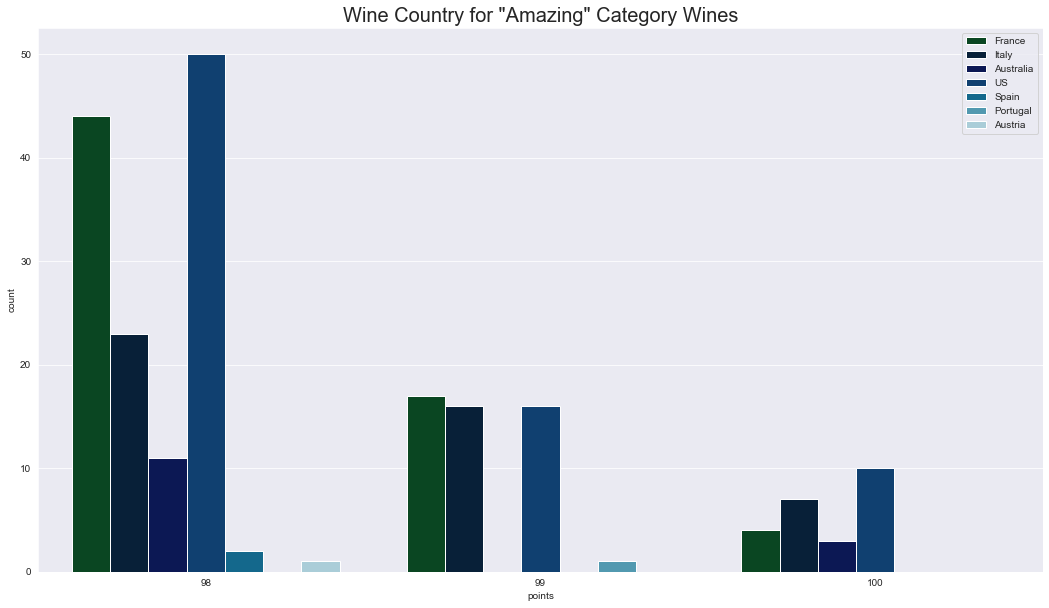

In [244]:
#Plot of wines in the 'amazing' category (98-100 points) sorted by province of origin.
plt.figure(figsize=(18,10))
ax = sb.countplot(x='points', hue='country', data=dfwine[dfwine['rating_cat'] == 'amazing'], palette='ocean')

ax.legend(loc=1)
ax.set_title('Wine Country for "Amazing" Category Wines', fontsize=20)

A view of the province that each 'Amazing' cagtegory wine comes from. Depending on what we would like to do with this analysis, we could go into more depth into these wines if we needed as they are identified here easily. 

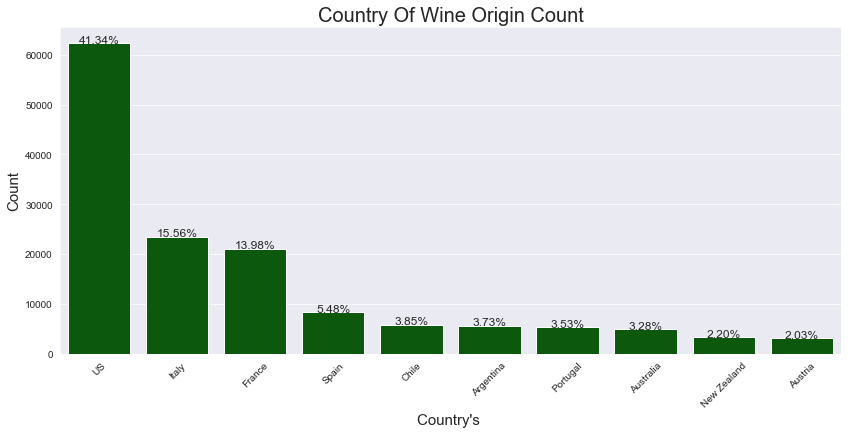

In [217]:
plt.figure(figsize=(14,6))

country = dfwine.country.value_counts()[:10]

g = sb.countplot(x='country', 
                  data=dfwine[dfwine.country.isin(country.index.values)],
                 color='darkgreen', order=('US','Italy','France','Spain','Chile','Argentina', 'Portugal', 'Australia','New Zealand','Austria'))
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

sizes=[]
#asigning data labels base on total percentage
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=12) 

plt.show()

Distribution of wines by country of origin.

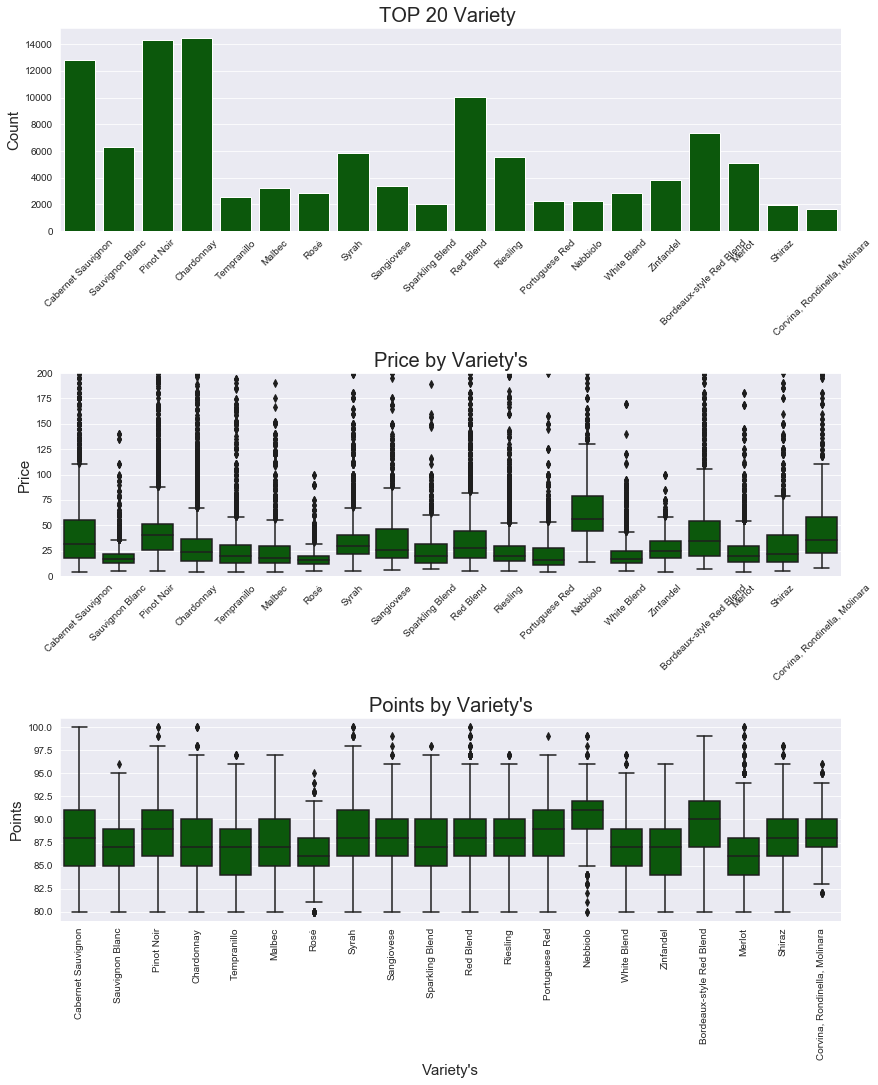

In [237]:


plt.figure(figsize=(14,16))

variety = dfwine.variety.value_counts()[:20]
plt.subplot(3,1,1)
g = sb.countplot(x='variety', 
                  data=dfwine.loc[(dfwine.variety.isin(variety.index.values))], 
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sb.boxplot(y='price', x='variety',
                  data=dfwine.loc[(dfwine.variety.isin(variety.index.values))], 
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylim(0, 200)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sb.boxplot(y='points', x='variety',
                  data=dfwine.loc[(dfwine.variety.isin(variety.index.values))], 
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Taking the top 20 varieties of wine and plotting their respective count, price, and point scores. 

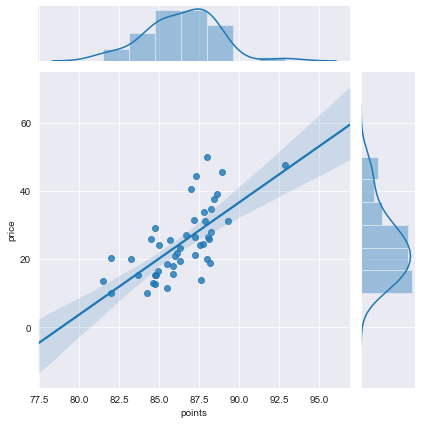

In [167]:
sb.jointplot(x='points', y='price', data=winesg, kind='reg')

Joint plot gives us the relationship between wine points and price where each data point represents the average value by country. Depending what we wanted to pursue with this analysis, we could find the cheapest wine countries with the highest point values (closest to the bottom and right hand side) and then break that down further by specific wines. Or we could find the most expensive wines with the lowest point ratings by country, (closest to the top and farthest to the left) and break those wines down specifically. The analysis is left open ended to show the avenues of possible you could persue from this type of data analysis. 

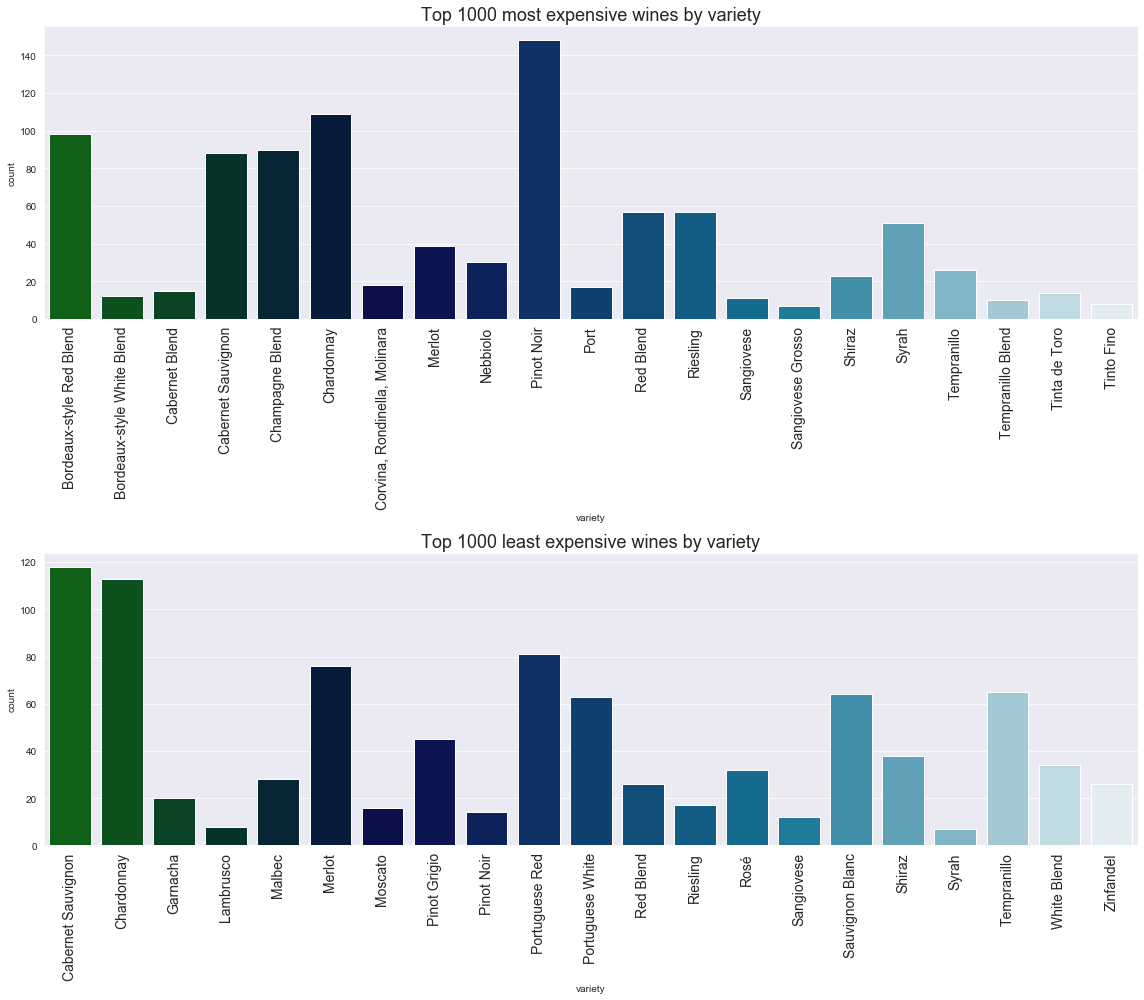

In [241]:

#create new df selecting the top 1000 wines by price and sorting alphabetically.
wines = dfwine.nlargest(1000, ['price']).sort_values('variety')

threshold = 6 # Anything that occurs less than this will be removed for the sake of keeping the data clean as there is lots of 1 of varieties.
value_counts = wines.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= threshold].index
wines.replace(to_remove, np.nan, inplace=True)

plt.figure(figsize=(16,14))
plt.subplot(2,1,1)
ax = sb.countplot(x='variety', data=wines, palette='ocean')
plt.xticks(rotation=(90), fontsize=14)
plt.title("Top 1000 most expensive wines by variety", fontsize=18)

#create new df selecting the lowest 1000 wines by price and sorting alphabetically.
winesl = dfwine.nsmallest(1000, ['price']).sort_values('variety')

threshold = 6 # Anything that occurs less than this will be removed for the sake of keeping the data clean.
value_counts = winesl.stack().value_counts()
to_remove = value_counts[value_counts <= threshold].index
winesl.replace(to_remove, np.nan, inplace=True)

plt.subplot(2,1,2)
ax2 = sb.countplot(x='variety', data=winesl, palette='ocean')
plt.xticks(rotation=(90), fontsize=14)
plt.title("Top 1000 least expensive wines by variety", fontsize=18)
plt.tight_layout()
plt.show()




Here we created new dataframes that pull the 1000 most expensive and least expensive wines and group them by category to see which variety of wines are associated with being expensive, and which ones are associated with being cheap.

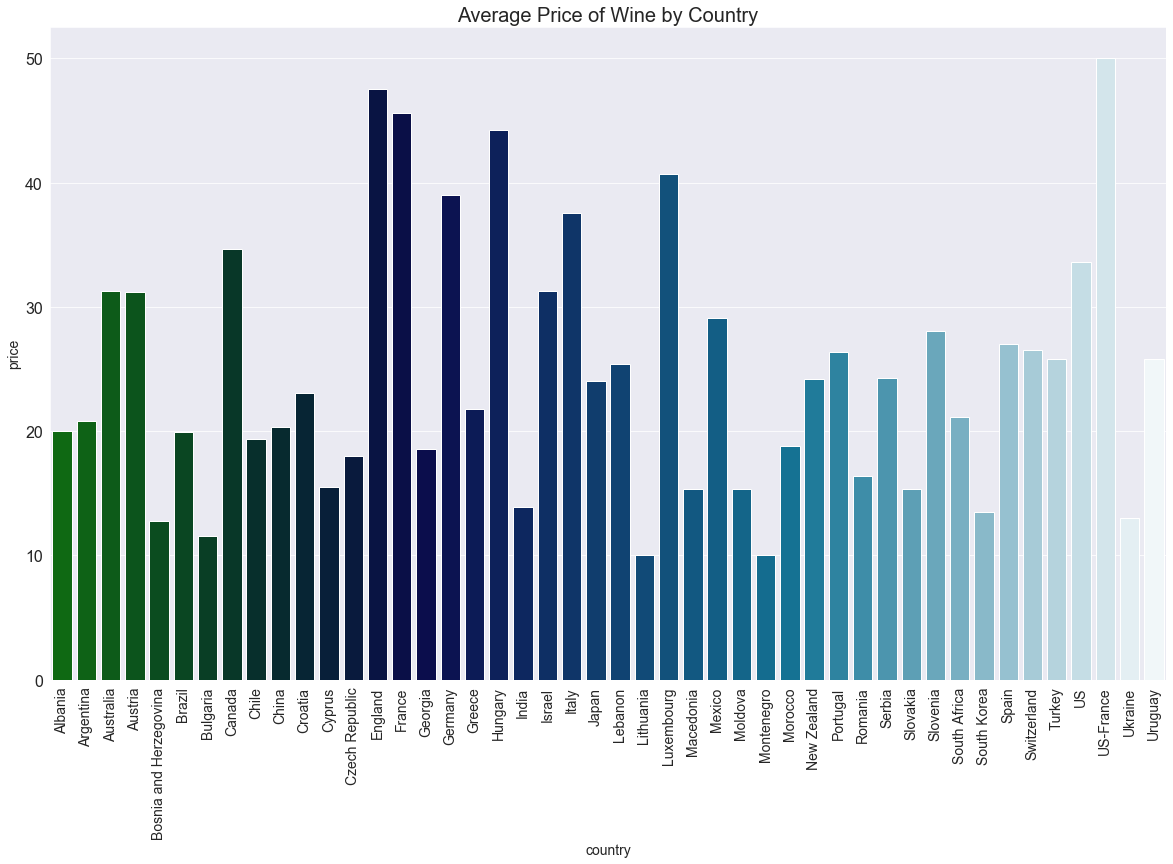

<Figure size 432x288 with 0 Axes>

In [247]:
winesg = dfwine.groupby('country').mean().dropna().reset_index().sort_values('country')

#winesg.head(20)

plt.figure(figsize=(20,12))
plt.xticks(rotation=(90), fontsize=14)
plt.yticks(fontsize=16)
plt.title("Average Price of Wine by Country", fontsize=20)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Price', fontsize=14)
sb.barplot(x='country', y='price', data=winesg, palette='ocean')



plt.show()
plt.tight_layout()






Here is the average price of all wines from a particular country. 

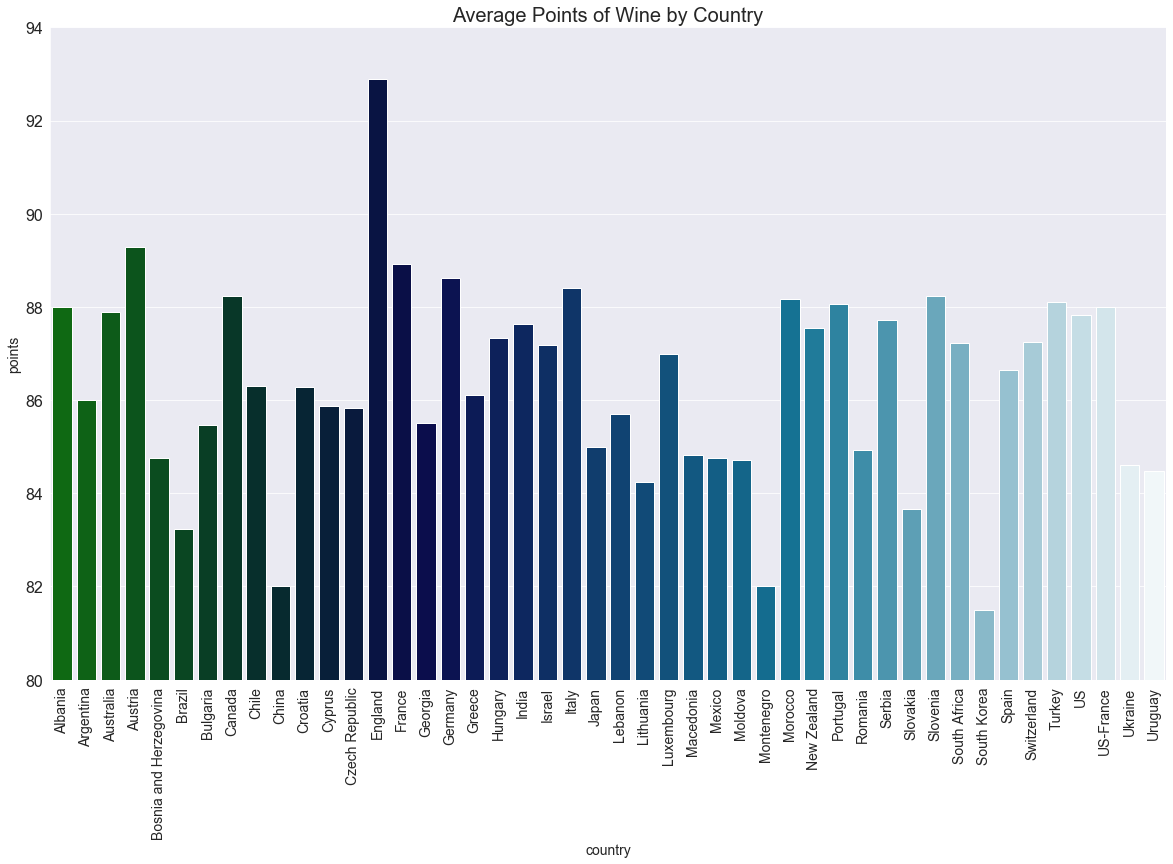

<Figure size 432x288 with 0 Axes>

In [245]:
winesg = dfwine.groupby('country').mean().dropna().reset_index().sort_values('country')

winesg.head(20)

plt.figure(figsize=(20,12))
plt.xticks(rotation=(90), fontsize=14)
plt.yticks(fontsize=16)
plt.title("Average Points of Wine by Country", fontsize=20)
plt.xlabel('Country',fontsize=14)
plt.ylim([80,94])
plt.ylabel('Price', fontsize=14)
sb.barplot(x='country', y='points', data=winesg, palette='ocean')



plt.show()
plt.tight_layout()

Here is the average points for all wines from a particular country.

The purpose of this workbook is to show the power and versatility python provides in terms of data analysis. At any point we could have taken any one of these metrics and used that to drill down to a particular topic. for example, if we wanted to start an international wine subscription club, what wines would we select that are relatively low in price, high in point score (which we can view as analagous to quality)? We could cross refrence both the last two charts to make this selection and then drill down to which wines in particular we want to provide (which wines are considered 'cheap' varieties, which are considered 'expensive' or fancy')? Again we can use previous charts to help answer these questions. 
Overall this book is used as a basis to show how I can use Python to serve as a baseline for answering or analyizing business propositions.
I hope you learned something from this workbook!
-Bryan